<a href="https://colab.research.google.com/github/harshborkar07/Task7_sales_summary/blob/main/Task7_Sales_Summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


**Creating Database**

In [6]:
import sqlite3

# Create a database file in Colab
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create sales table
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
''')

# Insert sample sales data
sample_data = [
    ("Laptop", 5, 70000),
    ("Laptop", 3, 68000),
    ("Phone", 10, 30000),
    ("Phone", 7, 32000),
    ("Headphones", 15, 2000),
    ("Headphones", 12, 1800),
    ("Tablet", 4, 25000)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)

conn.commit()
conn.close()


**Query Data**

In [7]:
import sqlite3
import pandas as pd

# Connect to DB
conn = sqlite3.connect("sales_data.db")

# SQL query: get total quantity + revenue per product
query = """
SELECT product, SUM(quantity) AS total_qty, SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

# Load into pandas DataFrame
df = pd.read_sql_query(query, conn)
print("Sales Summary:\n", df)

conn.close()


Sales Summary:
       product  total_qty    revenue
0  Headphones         54   103200.0
1      Laptop         16  1108000.0
2       Phone         34  1048000.0
3      Tablet          8   200000.0


**Chart Plot**

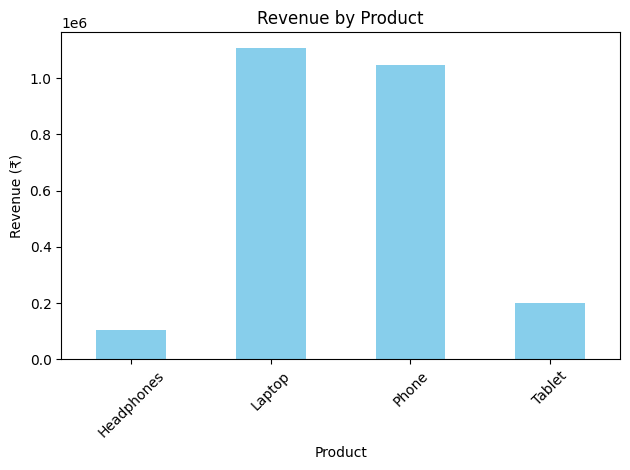

In [8]:
import matplotlib.pyplot as plt

# Plot bar chart
df.plot(kind="bar", x="product", y="revenue", legend=False, color="skyblue")
plt.title("Revenue by Product")
plt.ylabel("Revenue (₹)")
plt.xlabel("Product")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
